In [1]:
# Let´s prototype a model to predict stock prices

In [2]:
import pandas as pd
import yfinance as yf

In [3]:
# S&P500 --> '^GSPC'   
assets = ['IBM', 'MGM', 'T', 'BA', 'GOOG', 'AAPL', 'TSLA', 'MSFT', 'FB', '^GSPC']

In [4]:
ticker = yf.Ticker('IBM') 

#tsla_df = ticker.history(period="max")

tsla_df = ticker.history(start='2019-01-01', 
                         end='2019-12-31', 
                         back_adjust=True)

tsla_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-12-31,90.172740,90.984318,89.448685,90.443268,5212009,0.0,0
2019-01-02,89.122473,92.281264,88.867864,91.668602,4434935,0.0,0
2019-01-03,91.127557,91.406042,89.663529,89.838577,4546648,0.0,0
2019-01-04,91.429904,93.482719,91.055939,93.347458,4683779,0.0,0
2019-01-07,93.490669,94.548907,92.830270,94.007851,3923755,0.0,0


<AxesSubplot:title={'center':"TSLA's stock price"}, xlabel='Date'>

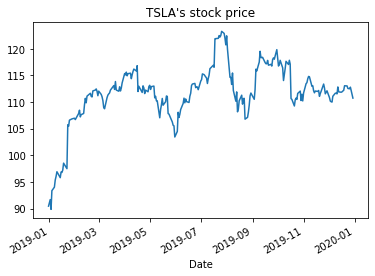

In [5]:
tsla_df['Close'].plot(title="TSLA's stock price")

In [6]:
#ticker.info